<a href="https://colab.research.google.com/github/TiagoBem/PredictionModel/blob/main/RandomForest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
import joblib
from sklearn.preprocessing import MinMaxScaler


dataset = pd.read_csv('BiggestSeq.csv')
dataset = dataset.dropna()
dataset = dataset.loc[:,~dataset.columns.str.match("Unnamed")]

#flag = len(dataset)//2
#dataset = dataset.iloc[:len(dataset)//2]
#dataset_pos = dataset.iloc[len(dataset)//2:]
#print(len(dataset)//2)
#print(dataset)
#print()
#print(dataset_pos)

scaler = MinMaxScaler(feature_range=(0,1))
print(dataset)
print(dataset.columns)

Q1 = dataset['DL_bitrate'].quantile(0.25)
Q3 = dataset['DL_bitrate'].quantile(0.75)
nineth = dataset['DL_bitrate'].quantile(0.9)
media = dataset['DL_bitrate'].mean()
IQR = Q3 - Q1
filter = (dataset['DL_bitrate'] >= Q1 - 1.5 * IQR) | (dataset['DL_bitrate'] <= Q3 + 1.5 * IQR)
dataset = dataset.loc[filter]  

y = dataset['DL_bitrate']
X = dataset.drop(['DL_bitrate'], axis = 1)

print(y)
#y = pd.DataFrame(scalerY.fit_transform(y.to_numpy().reshape(-1,1)), columns=['UL_bitrate'])
#X = pd.DataFrame(scalerX.fit_transform(X), columns=X.columns)

train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.3)
train_X = scaler.fit_transform(train_X)
test_X = scaler.fit_transform(test_X)
train_y = scaler.fit_transform(train_y.to_numpy().reshape(-1,1))
test_y = scaler.fit_transform(test_y.to_numpy().reshape(-1,1))

#test_X = np.reshape(test_X, (test_X.shape[0], 1, test_X.shape[1]))
#train_X = np.reshape(train_X, (train_X.shape[0], 1, train_X.shape[1]))

parameters = {'n_estimators': 30}

#define model          
RF_model = RandomForestRegressor(**parameters)

print("train_X shape: ", train_X.shape)
print("train_y shape: ", train_y.shape)

#train model
import timeit
start = timeit.default_timer()
RF_model.fit(train_X, train_y)
stop = timeit.default_timer()
print('Fit Time: ', stop - start)  


# save model
joblib.dump(RF_model, 'randomforestfinal.joblib')



      Hours  Weekday  Month  ...  DL_bitrate_N-4  UL_bitrate_N-4  UL_bitrate
0         7        4      1  ...          9595.0           170.0         383
1         7        4      1  ...          7772.0           176.0         416
2         7        4      1  ...          6531.0           116.0         222
3         7        4      1  ...         21842.0           324.0         260
4         7        4      1  ...         20410.0           383.0         174
...     ...      ...    ...  ...             ...             ...         ...
6241     10        0     12  ...         15042.0           274.0         367
6242     10        0     12  ...         18006.0           331.0         408
6243     10        0     12  ...         22546.0           414.0         499
6244     10        0     12  ...         17648.0           371.0         484
6245     10        0     12  ...         20243.0           367.0         362

[6246 rows x 29 columns]
Index(['Hours', 'Weekday', 'Month', 'Speed', 'RSRP

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:61: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Fit Time:  1.4995705040000757


['randomforestfinal.joblib']

Prediction Time:  0.01874295400000392
[0.11010934 0.1358515  0.15325846 ... 0.12183241 0.1091355  0.19497847]
Mean Absolute Error: 2706.578
Mean Squared Error: 22068375.376
Root Mean Squared Error: 4697.699
R2 score:  0.94
        ARE Values
count  1874.000000
mean     12.456923
std      52.427700
min       0.000000
25%       4.075296
50%       8.169156
75%      14.419296
max    2180.090658


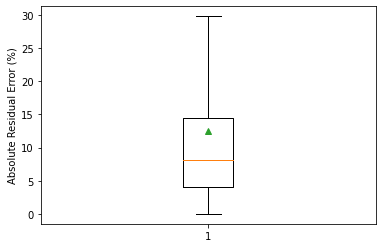

'\nsem summarization\nMean Absolute Error: 0.015172559643440298\nMean Squared Error: 0.0007058447138777814\nRoot Mean Squared Error: 0.026567738215320127\nR2 score:  0.94\n          ARE Values\ncount   22733.000000\nmean       31.191403\nstd      1225.833261\nmin         0.000000\n25%         4.802186\n50%         8.727961\n75%        15.697422\nmax    134474.618297\n\nMean summarization\nMean Absolute Error: 0.012256013189242453\nMean Squared Error: 0.0005462512063908556\nRoot Mean Squared Error: 0.023372017593499616\nR2 score:  0.95\n          ARE Values\ncount   22733.000000\nmean       28.072958\nstd      1367.829050\nmin         0.000000\n25%         6.703003\n50%        11.092262\n75%        17.655682\nmax    205538.933380\n\nIQR summarization\nMean Absolute Error: 0.010090831633481243\nMean Squared Error: 0.0004316813638809724\nRoot Mean Squared Error: 0.02077694308316246\nR2 score:  0.96\n         ARE Values\ncount  22733.000000\nmean      16.756589\nstd      121.610885\nmin   

In [ ]:
#Test model
start = timeit.default_timer()
RF_predictions = RF_model.predict(test_X)
stop = timeit.default_timer()
print('Prediction Time: ', stop - start) 
print(RF_predictions)

import matplotlib.pyplot as plt

def mean_absolute_percentage_error(a, b): 
    mask = a != 0
    return (np.fabs(a - b)/a)[mask].mean()

def absolute_residual_error(a, b):
  total = np.array([])
  for i in range(len(a)):
    res = (np.fabs( max(a[i], 10) - max(b[i], 10))) / (max(a[i], 10))
    total = np.append(total, res * 100)
  return total

test_y2 = scaler.inverse_transform(test_y)
RF_predictions2 = scaler.inverse_transform(RF_predictions.reshape(-1,1))

# evaluation
print('Mean Absolute Error: %.3f' % metrics.mean_absolute_error(test_y2, RF_predictions2))
#print('Mean Absolute Percentage Error:', mean_absolute_percentage_error(test_y, RF_predictions))
print('Mean Squared Error: %.3f' % metrics.mean_squared_error(test_y2, RF_predictions2))
print('Root Mean Squared Error: %.3f' % np.sqrt(metrics.mean_squared_error(test_y2, RF_predictions2)))
print("R2 score: ", round(metrics.r2_score(test_y2, RF_predictions2), 2))
eval_true = scaler.inverse_transform(test_y)
eval_pred = scaler.inverse_transform(RF_predictions.reshape(-1,1))

are = absolute_residual_error(eval_true, eval_pred)
df = pd.DataFrame(are, columns=['ARE Values'])
print(df.describe())
plt.boxplot(df.to_numpy(), showfliers=False, showmeans=True)
plt.ylabel('Absolute Residual Error (%)')
plt.show()

np.save("nineth2_rf.npy", df.to_numpy())




'''
sem summarization
Mean Absolute Error: 0.015172559643440298
Mean Squared Error: 0.0007058447138777814
Root Mean Squared Error: 0.026567738215320127
R2 score:  0.94
          ARE Values
count   22733.000000
mean       31.191403
std      1225.833261
min         0.000000
25%         4.802186
50%         8.727961
75%        15.697422
max    134474.618297

Mean summarization
Mean Absolute Error: 0.012256013189242453
Mean Squared Error: 0.0005462512063908556
Root Mean Squared Error: 0.023372017593499616
R2 score:  0.95
          ARE Values
count   22733.000000
mean       28.072958
std      1367.829050
min         0.000000
25%         6.703003
50%        11.092262
75%        17.655682
max    205538.933380

IQR summarization
Mean Absolute Error: 0.010090831633481243
Mean Squared Error: 0.0004316813638809724
Root Mean Squared Error: 0.02077694308316246
R2 score:  0.96
         ARE Values
count  22733.000000
mean      16.756589
std      121.610885
min        0.000000
25%        3.166815
50%        7.046980
75%       14.995581
max    10466.519698

summarization 90th
Mean Absolute Error: 0.011272484457812563
Mean Squared Error: 0.0005251686232081145
Root Mean Squared Error: 0.022916557839433794
R2 score:  0.95
         ARE Values
count  22733.000000
mean      19.586143
std      184.692694
min        0.000000
25%        2.915145
50%        7.167705
75%       15.968074
max    16497.473303

'''

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if sys.path[0] == '':


Mean Absolute Error: 19106.108
Mean Squared Error: 678309792.081
Root Mean Squared Error: 26044.381
R2 score:  -0.85
          ARE Values
count    1874.000000
mean     1538.322783
std     21841.819573
min         0.181343
25%        32.818902
50%        65.238388
75%        99.965768
max    607371.371082


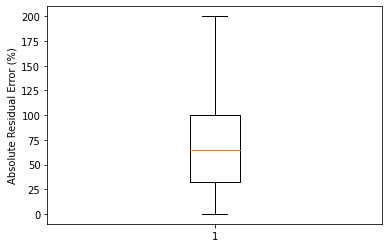

In [ ]:
y_pos = dataset['DL_bitrate']
X_pos = dataset.drop(['DL_bitrate'], axis = 1)
#print(dataset_pos)
#y = pd.DataFrame(scalerY.fit_transform(y.to_numpy().reshape(-1,1)), columns=['UL_bitrate'])
#X = pd.DataFrame(scalerX.fit_transform(X), columns=X.columns)
train_X_pos, test_X_pos, train_y_pos, test_y_pos = train_test_split(X_pos, y_pos, test_size=0.3)
train_X_pos = scaler.fit_transform(train_X_pos)
test_X_pos = scaler.fit_transform(test_X_pos)
train_y_pos = scaler.fit_transform(train_y_pos.to_numpy().reshape(-1,1))
test_y_pos = scaler.fit_transform(test_y_pos.to_numpy().reshape(-1,1))

RF_model.fit(train_X, train_y)

RF_predictions_pos = RF_model.predict(test_X)


test_y2_pos = scaler.inverse_transform(test_y_pos)
RF_predictions2_pos = scaler.inverse_transform(RF_predictions_pos.reshape(-1,1))

# evaluation
print('Mean Absolute Error: %.3f' % metrics.mean_absolute_error(test_y2_pos, RF_predictions2_pos))
#print('Mean Absolute Percentage Error:', mean_absolute_percentage_error(test_y, RF_predictions))
print('Mean Squared Error: %.3f' % metrics.mean_squared_error(test_y2_pos, RF_predictions2_pos))
print('Root Mean Squared Error: %.3f' % np.sqrt(metrics.mean_squared_error(test_y2_pos, RF_predictions2_pos)))
print("R2 score: ", round(metrics.r2_score(test_y2_pos, RF_predictions2_pos), 2))
eval_true_pos = scaler.inverse_transform(test_y_pos)
eval_pred_pos = scaler.inverse_transform(RF_predictions_pos.reshape(-1,1))

are_pos = absolute_residual_error(eval_true_pos, eval_pred_pos)
df_pos = pd.DataFrame(are_pos, columns=['ARE Values'])
print(df_pos.describe())
plt.boxplot(df_pos.to_numpy(), showfliers=False)
plt.ylabel('Absolute Residual Error (%)')
plt.show()

In [ ]:
# Get numerical feature importances
importances = list(RF_model.feature_importances_)
feature_list = ['Hours', 'Weekday', 'Month', 'Speed', 'RSRP', 'RSRQ', 'DL_bitrate',
                'Speed_N-1', 'RSRP_N-1', 'RSRQ_N-1', 'DL_bitrate_N-1', 'UL_bitrate_N-1',
                'Speed_N-2', 'RSRP_N-2', 'RSRQ_N-2', 'DL_bitrate_N-2', 'UL_bitrate_N-2',
                'Speed_N-3', 'RSRP_N-3', 'RSRQ_N-3', 'DL_bitrate_N-3', 'UL_bitrate_N-3',
                'Speed_N-4', 'RSRP_N-4', 'RSRQ_N-4', 'DL_bitrate_N-4', 'UL_bitrate_N-4',
                'UL_bitrate']
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: UL_bitrate           Importance: 0.81
Variable: DL_bitrate_N-1       Importance: 0.14
Variable: UL_bitrate_N-1       Importance: 0.01
Variable: DL_bitrate_N-4       Importance: 0.01
Variable: Hours                Importance: 0.0
Variable: Weekday              Importance: 0.0
Variable: Month                Importance: 0.0
Variable: Speed                Importance: 0.0
Variable: RSRP                 Importance: 0.0
Variable: RSRQ                 Importance: 0.0
Variable: DL_bitrate           Importance: 0.0
Variable: Speed_N-1            Importance: 0.0
Variable: RSRP_N-1             Importance: 0.0
Variable: RSRQ_N-1             Importance: 0.0
Variable: Speed_N-2            Importance: 0.0
Variable: RSRP_N-2             Importance: 0.0
Variable: RSRQ_N-2             Importance: 0.0
Variable: DL_bitrate_N-2       Importance: 0.0
Variable: UL_bitrate_N-2       Importance: 0.0
Variable: Speed_N-3            Importance: 0.0
Variable: RSRP_N-3             Importance: 0.0
Variable:

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


data_IQR = np.load("iqr_rf.npy")
data_mean = np.load("mean_rf.npy")
data_nineth = np.load("nineth_rf.npy")
data_without = np.load("without_rf.npy")

data_nineth2 = np.load("nineth2_rf.npy")

print(max(data_IQR))
print(max(data_mean))
print(max(data_nineth))
print(max(data_without))
print(max(data_nineth2))
result = np.where(data_nineth2 == max(data_nineth2))
print(result[0])
print(test_y2[result[0]+4])
print(RF_predictions2[result[0]+4])
print(absolute_residual_error(test_y2[result[0]] , RF_predictions2[result[0]]))
'''
plt.boxplot(data_IQR, positions = [1], showfliers=False, showmeans=True)
plt.boxplot(data_mean, positions = [2], showfliers=False, showmeans=True)
plt.boxplot(data_nineth, positions = [3], showfliers=False, showmeans=True)
plt.boxplot(data_without, positions = [4], showfliers=False, showmeans=True)
'''
plt.figure(figsize=(8, 6), dpi=80)
#plt.hist(data_IQR)
#plt.hist(data_mean)
#plt.hist(data_nineth)
#plt.hist(data_without)
#plt.xticks([1,2,3,4],["IQR","Mean","90th","None"])
#plt.ylim([-0.5,55])
plt.grid()
plt.show()

FileNotFoundError: ignored

(1874,)


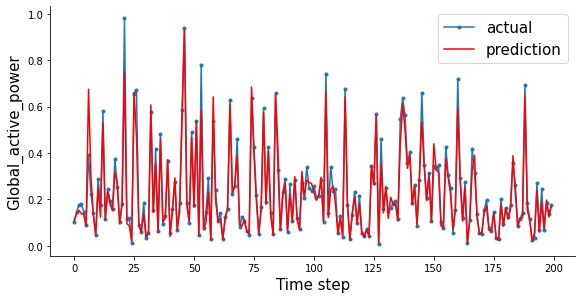

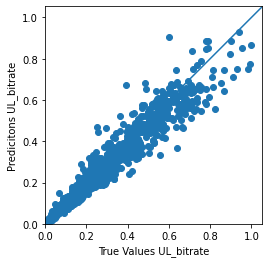

In [ ]:
import seaborn as sns
'''
plt.plot(history.history['loss'], label='MAE (training data)')
plt.plot(history.history['val_loss'], label='MAE (validation data)')
plt.ylabel('MAE value')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()
'''


#RF_predictions = scalerY.inverse_transform(RF_predictions.reshape(-1,1))
#test_y = scalerY.inverse_transform(test_y)

print(RF_predictions.shape)
aa=[x for x in range(200)]
plt.figure(figsize=(8,4))
plt.plot(aa, test_y[:200], marker='.', label="actual")
plt.plot(aa, RF_predictions[:200], 'r', label="prediction")
# plt.tick_params(left=False, labelleft=True) #remove ticks
plt.tight_layout()
sns.despine(top=True)
plt.subplots_adjust(left=0.07)
plt.ylabel('Global_active_power', size=15)
plt.xlabel('Time step', size=15)
plt.legend(fontsize=15)
plt.show();


plt.scatter(test_y, RF_predictions)
plt.xlabel('True Values UL_bitrate')
plt.ylabel('Predicitons UL_bitrate')
plt.axis('equal')
plt.axis('square')
plt.xlim([0, plt.xlim()[1]])
plt.ylim([0, plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100])


In [ ]:
#predict first row
model = joblib.load("randomforestfinal.joblib")

#test = pd.DataFrame(np.array([[2,1,0,-98,-13,18285]]), columns=['Weekday','Month','Speed','RSRP','RSRQ','DL_bitrate'])
#test = train_X.iloc[0].to_numpy().reshape(1,len(train_X.iloc[0]))
#print(len(test_X.to_numpy()[0]))
test = test_X[100].reshape(1, len(test_X[100]))
print(test)
print(type(test))
print(test.shape)

result = model.predict(test)
print(result)
print(train_y[100])
result = scaler.inverse_transform(result.reshape(-1,1))
test_y = scaler.inverse_transform(test_y)
print("expected: ", test_y[100])
print("predicted:", result)
#print(train_y.iloc[0])

[[0.         1.         0.         0.734375   0.26666667 0.5
  0.5        0.734375   0.24615385 0.5        0.33255131 0.13423181
  0.734375   0.3015873  0.57142857 0.28529597 0.10358255 0.734375
  0.32307692 0.57142857 0.35004094 0.17235436 0.734375   0.35384615
  0.57142857 0.52345869 0.2763099  0.10124611]]
<class 'numpy.ndarray'>
(1, 28)
[0.23314074]
[7.75893274e+13]
expected:  [26831.00284351]
predicted: [[24108.38470463]]


In [ ]:

#sem efeito

mse = tf.keras.losses.MeanSquaredError()
print("mean squared error:" ,mse(test_Y, result).numpy())
m2 = tf.keras.metrics.RootMeanSquaredError()
m2.update_state(result, test_Y)
print("root mean squared error: ", m2.result().numpy())
m3 = tf.keras.metrics.MeanAbsoluteError()
m3.update_state(test_Y, result)
print("Mean Absolute Error: ",m3.result().numpy())
m4 = tf.keras.metrics.MeanAbsolutePercentageError()
m4.update_state(test_Y, result)
result = result.reshape(len(result),1)
print("Mean Absolute Percentage Error: ",mean_absolute_percentage_error(test_Y,result))
print()

NameError: ignored